In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
df = pd.read_csv("desktop/sephora_sales.csv")

In [63]:
df.head(3)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0


In [64]:
df.isnull().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [65]:
df["discount_perc"] = round(((df["value_price"] - df["price"])/df["price"]) * 100, 2)
df["online_only"] = df["online_only"].replace([0, 1], ["In Store", "Online Only"])
df["exclusive"] = df["exclusive"].replace([0, 1], ["Not Exclusive", "Exclusive"])
df["limited_edition"] = df["limited_edition"].replace([0, 1], ["Not Limited Edition", "Limited Edition"])

df.head(3)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,discount_perc
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,Online Only,Not Exclusive,Not Limited Edition,0,13.64
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,Online Only,Not Exclusive,Not Limited Edition,0,0.00
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,Online Only,Not Exclusive,Not Limited Edition,0,0.00


In [66]:
category_count = df["category"].value_counts().head(20).reset_index()
category_count = category_count.rename(columns={"index":"category", "category":"sold_count"})

category_price = df.groupby("category")["price"].median().reset_index()

category_df = pd.merge(category_price, category_count, on="category")

category_df = category_df.sort_values("sold_count", ascending = False).reset_index().drop(columns="index")

category_df

,category,price,sold_count
0,Perfume,99.0,665
1,Moisturizers,54.0,451
2,Face Serums,68.0,384
3,Value & Gift Sets,42.0,378
4,Face Wash & Cleansers,32.0,247
5,Face Masks,39.0,230
6,Rollerballs & Travel Size,29.0,228
7,Hair Styling Products,28.5,224
8,Eye Palettes,45.5,202
9,Lipstick,28.0,191


### Top 20 Categories with respective 'Amount Sold' and 'Median Price'

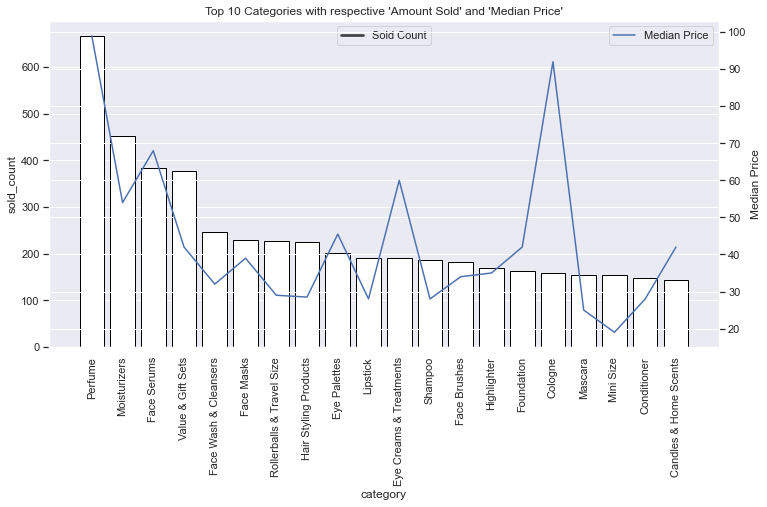

In [67]:
ax1 = sns.barplot(data = category_df,  x = "category", y = "sold_count", color = "white", edgecolor="black")
ax1.set_xticklabels(category_df["category"], rotation = 90)
ax1.legend(["Sold Count"], loc="upper center")

ax2 = ax1.twinx()

ax2 = sns.lineplot(data = category_df, x = "category", y = "price", ax = ax2)
ax2.set_ylabel("Median Price")
ax2.legend(["Median Price"], loc="upper right")

plt.title("Top 10 Categories with respective 'Amount Sold' and 'Median Price'")

sns.set(rc={"figure.figsize":(12, 6)})
plt.show()

In [68]:
brand_count = df["brand"].value_counts().reset_index().head(20).rename(columns={"index":"brand", "brand":"sold_count"})
brand_discount = df.groupby("brand")["discount_perc"].mean().reset_index()
brand_price = df.groupby("brand")["price"].median().reset_index()
brand_rating = df.groupby("brand")["rating"].mean().reset_index()
brand_love = df.groupby("brand")["love"].median().reset_index()

temp = pd.merge(brand_count, brand_discount, on="brand")
temp2 = pd.merge(temp, brand_rating, on="brand")
temp3 = pd.merge(temp2, brand_love, on="brand")
brand_df = pd.merge(temp3, brand_price, on="brand")

brand_df["revenue"] = brand_df["sold_count"] * brand_df["price"]
brand_df

,brand,sold_count,discount_perc,rating,love,price,revenue
0,SEPHORA COLLECTION,496,3.516149,3.851815,6200.0,14.0,6944.0
1,CLINIQUE,234,3.300299,3.927350,6500.0,28.0,6552.0
2,tarte,170,6.768235,4.005882,14150.0,24.0,4080.0
3,TOM FORD,161,0.000000,3.953416,2400.0,70.0,11270.0
4,Dior,145,0.000000,3.993103,4800.0,55.0,7975.0
5,Fresh,138,2.290725,4.173913,7250.0,38.0,5244.0
6,Kiehl's Since 1851,126,1.819444,4.047619,4700.0,32.0,4032.0
7,Lancôme,120,5.777917,4.091667,5450.0,35.0,4200.0
8,Bumble and bumble,104,1.571635,3.793269,5550.0,29.5,3068.0
9,MAKE UP FOR EVER,99,0.137778,4.242424,8900.0,25.0,2475.0


### Top 10 Most Popular Brands with respective Revenue

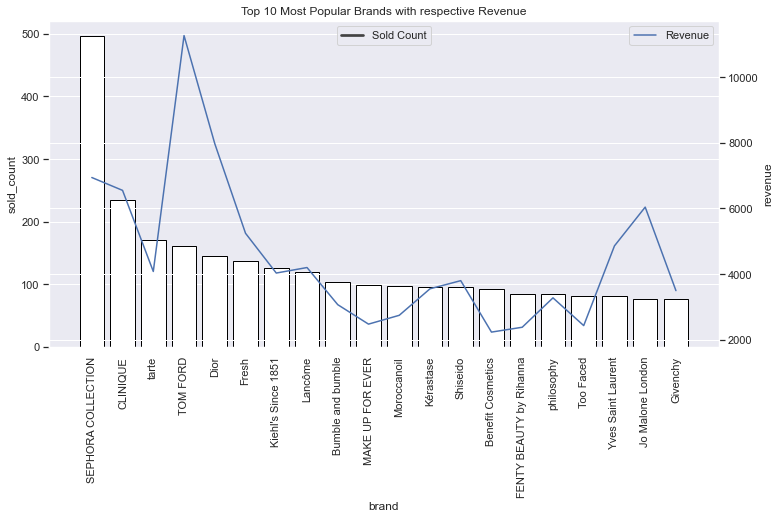

In [69]:
ax1 = sns.barplot(data = brand_df, x = "brand", y = "sold_count", color = "white", edgecolor = "black")
ax1.set_xticklabels(brand_df["brand"], rotation = 90)
ax1.legend(["Sold Count"], loc="upper center")

ax2 = ax1.twinx()

ax2 = sns.lineplot(data = brand_df, x = "brand", y = "revenue")
ax2.set_ylabel("revenue")
ax2.legend(["Revenue"], loc="upper right")

plt.title("Top 10 Most Popular Brands with respective Revenue")

sns.set(rc={"figure.figsize":(12, 6)})
plt.show()

### Top 10 Most Profitable Brands with the highest Total Revenue

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'TOM FORD'),
  Text(1, 0, 'Dior'),
  Text(2, 0, 'SEPHORA COLLECTION'),
  Text(3, 0, 'La Mer'),
  Text(4, 0, 'Jo Malone London'),
  Text(5, 0, 'CLINIQUE'),
  Text(6, 0, 'Dr. Barbara Sturm'),
  Text(7, 0, 'Fresh'),
  Text(8, 0, 'Shiseido'),
  Text(9, 0, 'Givenchy')])

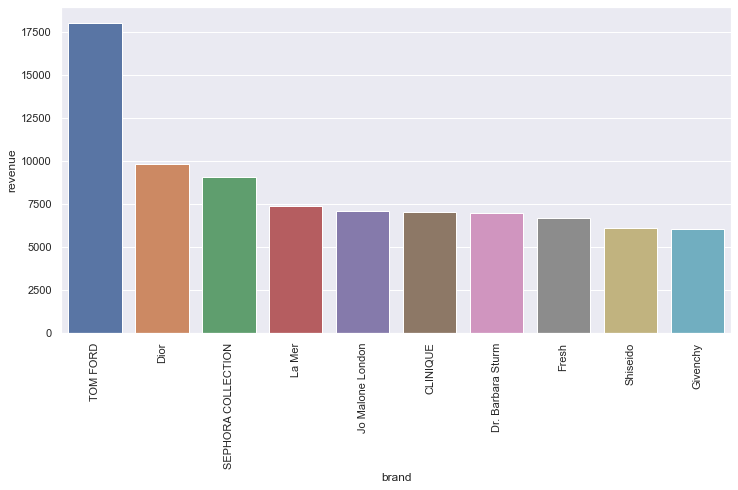

In [70]:
revenue_df = df.groupby("brand")["price"].sum().sort_values(ascending = False).head(10).reset_index().rename(columns = {"price":"revenue"})
sns.barplot(data = revenue_df, x = "brand", y ="revenue")
plt.xticks(rotation = 90)

###  Top 10 Most Popular Brands with respective Love Score

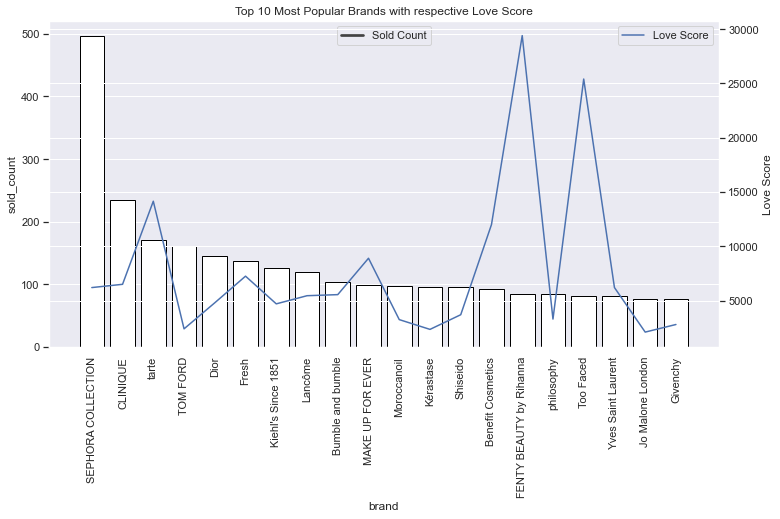

In [71]:
ax1 = sns.barplot(data = brand_df, x = "brand", y = "sold_count", color = "white", edgecolor = "black")
ax1.set_xticklabels(brand_df["brand"], rotation = 90)
ax1.legend(["Sold Count"], loc="upper center")

ax2 = ax1.twinx()

ax2 = sns.lineplot(data = brand_df, x = "brand", y = "love")
ax2.set_ylabel("Love Score")
ax2.legend(["Love Score"], loc="upper right")

plt.title("Top 10 Most Popular Brands with respective Love Score")

sns.set(rc={"figure.figsize":(12, 6)})
plt.show()

### Top 10 Brands with the highest Love Score 

Text(0, 0.5, 'Love Score')

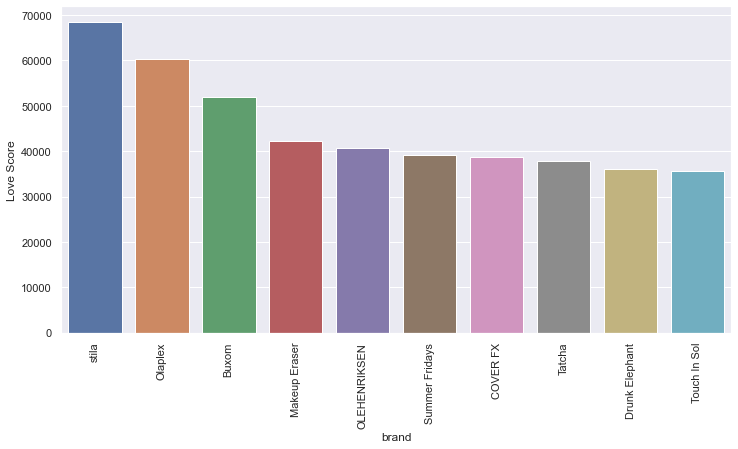

In [72]:
love_df = df.groupby("brand")["love"].median().sort_values(ascending = False).head(10).reset_index()
sns.barplot(data = love_df, x = "brand", y = "love")
plt.xticks(rotation = 90)
plt.ylabel("Love Score")

### Top 20 Most Popular Brands with respective Median Price

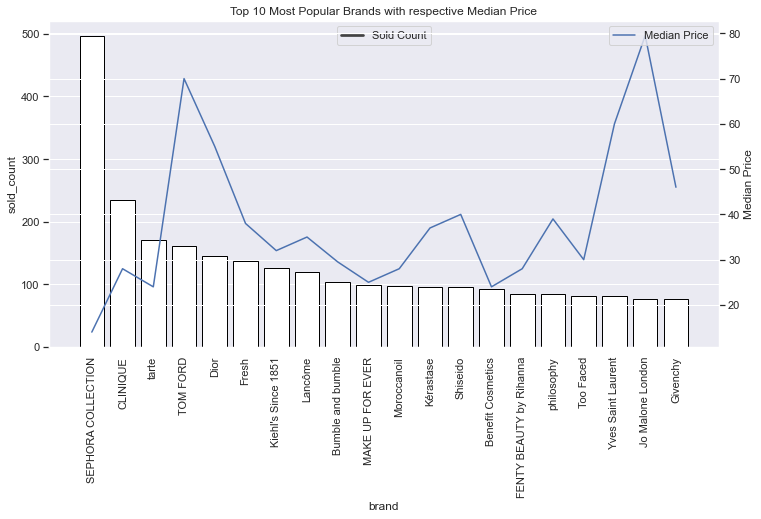

In [73]:
ax1 = sns.barplot(data = brand_df, x = "brand", y = "sold_count", color = "white", edgecolor = "black")
ax1.set_xticklabels(brand_df["brand"], rotation = 90)
ax1.legend(["Sold Count"], loc="upper center")

ax2 = ax1.twinx()

ax2 = sns.lineplot(data = brand_df, x = "brand", y = "price")
ax2.set_ylabel("Median Price")
ax2.legend(["Median Price"], loc="upper right")

plt.title("Top 10 Most Popular Brands with respective Median Price")

sns.set(rc={"figure.figsize":(12, 6)})
plt.show()

### Top 20 Most Popular Brands and respective Discount Percentage

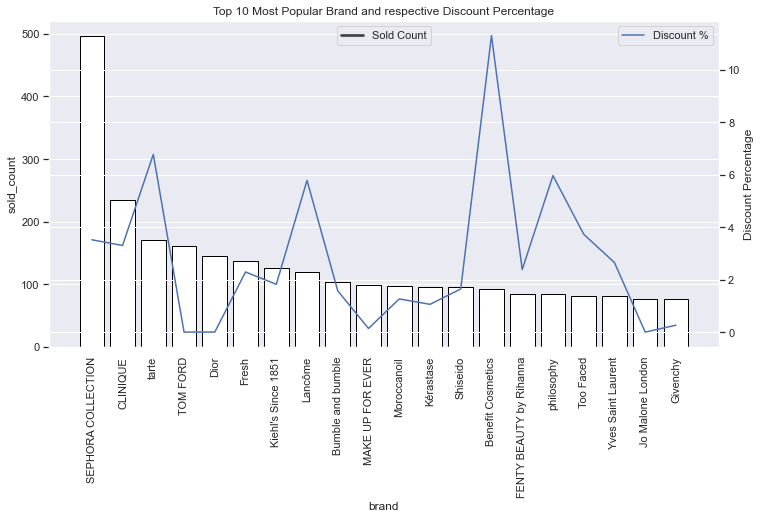

In [74]:
ax1 = sns.barplot(data = brand_df, x = "brand", y = "sold_count", color = "white", edgecolor = "black")
ax1.set_xticklabels(brand_df["brand"], rotation = 90)
ax1.legend(["Sold Count"], loc="upper center")

ax2 = ax1.twinx()

ax2 = sns.lineplot(data = brand_df, x = "brand", y = "discount_perc")
ax2.set_ylabel("Discount Percentage")
ax2.legend(["Discount %"], loc="upper right")

plt.title("Top 10 Most Popular Brand and respective Discount Percentage")
sns.set(rc={"figure.figsize":(12, 6)})
plt.show()

### Top 20 Most Popular Brands and respective Average Ratings

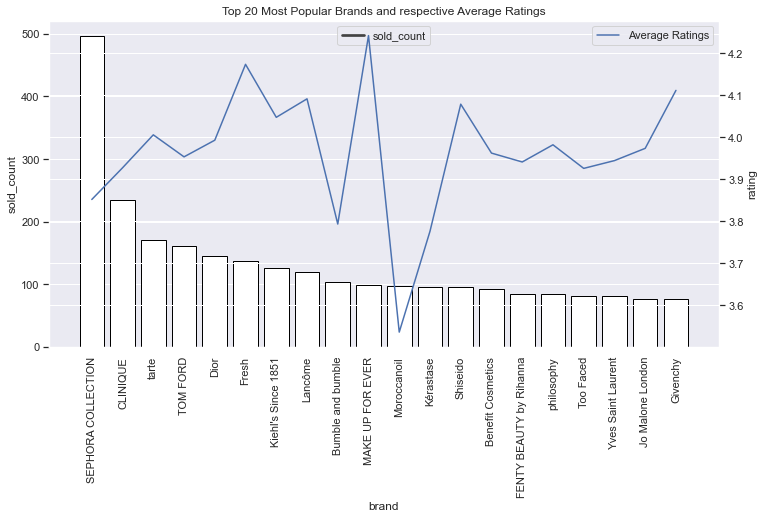

In [75]:
ax1 = sns.barplot(data = brand_df, x = "brand", y = "sold_count", color = "white", edgecolor = "black")
ax1.set_xticklabels(brand_df["brand"], rotation = 90)
ax1.legend(["sold_count"], loc="upper center")

ax2 = ax1.twinx()

ax2 = sns.lineplot(data = brand_df, x = "brand", y = "rating")
ax2.legend(["Average Ratings"], loc="upper right")

plt.title("Top 20 Most Popular Brands and respective Average Ratings")
plt.show()

### Percentage of Online Only Products 

([<matplotlib.patches.Wedge at 0x7fe35f050b50>,
 [Text(-0.7399009944643624, -0.8139696053235942, 'In Store'),
  Text(0.7399009182550245, 0.8139696745981214, 'Online Only')],
 [Text(-0.40358236061692493, -0.4439834210855968, '77%'),
  Text(0.40358231904819514, 0.4439834588717026, '23%')])

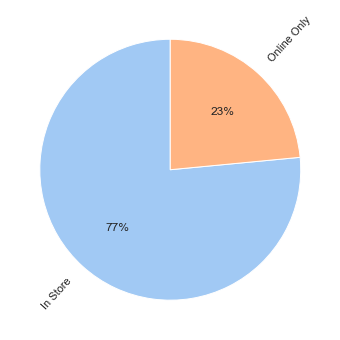

In [77]:
online = df["online_only"].value_counts().reset_index().rename(columns = {"index": "online/in_store", "online_only": "count"})

online["online/in_store"] = online["online/in_store"].replace([0, 1],["In Store", "Online Only"])

colors = sns.color_palette('pastel')

plt.pie(online["count"], startangle = 90, colors = colors, autopct='%.0f%%', labels = online["online/in_store"].tolist(), rotatelabels='true')


In [78]:
brand_online = df.groupby("brand")["online_only"].value_counts().to_frame()
brand_online = brand_online.rename(columns = {"online_only": "count"})
brand_online = brand_online.reset_index()

temp = brand_online.groupby("brand")["count"].sum().reset_index().rename(columns={"count": "total"})
temp2 = df.groupby("brand")["love"].median().reset_index()


online_df = pd.merge(brand_online, temp, on="brand")
online_df = online_df.sort_values("total", ascending = False).head(20)
online_df["online_only"] = online_df["online_only"].replace([0, 1],["In Store", "Online Only"])

online_df

,brand,online_only,count,total
391,SEPHORA COLLECTION,Online Only,36,496
390,SEPHORA COLLECTION,In Store,460,496
68,CLINIQUE,Online Only,38,234
67,CLINIQUE,In Store,196,234
539,tarte,Online Only,14,170
538,tarte,In Store,156,170
443,TOM FORD,In Store,127,161
444,TOM FORD,Online Only,34,161
118,Dior,In Store,128,145
119,Dior,Online Only,17,145


### Comparison between 'Online Only' Products and 'In Store' Products of Top 10 Most Popular Brands

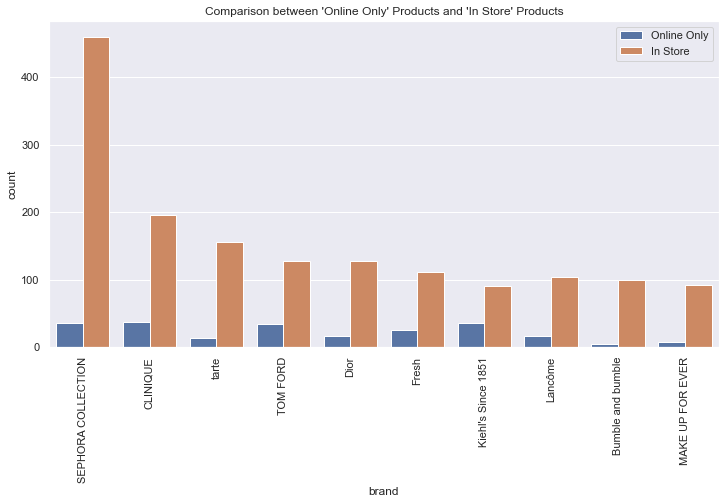

In [79]:
sns.barplot(data = online_df, x = "brand", y = "count", hue = "online_only")

plt.xticks(rotation = 90)
plt.legend(title="")
plt.title("Comparison between 'Online Only' Products and 'In Store' Products")
plt.show()

### Percentage of Sephora Exclusive Products

([<matplotlib.patches.Wedge at 0x7fe35e3dd7c0>,
 [Text(-0.8129546618665248, -0.7410160037067247, 'Not Exclusive'),
  Text(0.8129547312454467, 0.7410159275924127, 'Exclusive')],
 [Text(-0.4434298155635589, -0.40419054747639527, '74%'),
  Text(0.44342985340660723, 0.4041905059594978, '26%')])

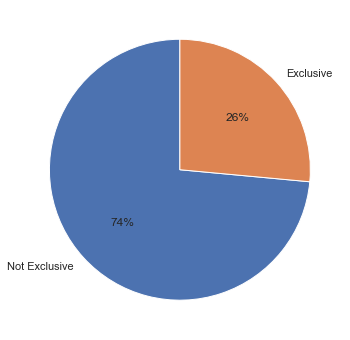

In [80]:
exclusive_df = df["exclusive"].value_counts().reset_index().rename(columns = {"index": "exclusive/not_exclusive", "exclusive": "count"})
plt.pie(exclusive_df["count"], startangle = 90, autopct='%.0f%%', labels = exclusive_df["exclusive/not_exclusive"])

### Percentage of Limited Edition Products

([<matplotlib.patches.Wedge at 0x7fe35f1bbc70>,
 [Text(-0.31299501008607417, -1.0545302857961067, 'Not Limited Edition'),
  Text(0.3129949360368852, 1.054530307774635, 'Limited Edition')],
 [Text(-0.17072455095604042, -0.5751983377069673, '91%'),
  Text(0.17072451056557372, 0.5751983496952554, '9%')])

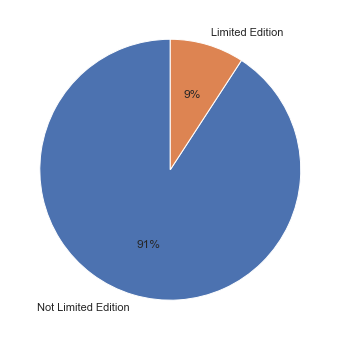

In [81]:
limited_df = df["limited_edition"].value_counts().reset_index().rename(columns={"index": "limited/not_limited", "limited_edition": "count"})
plt.pie(limited_df["count"], startangle = 90, autopct='%.0f%%', labels = limited_df["limited/not_limited"])